In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model

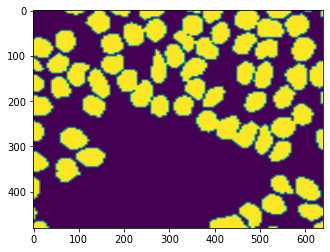

In [3]:
class UNetPredict:
    image_size = 256
    
    def __init__(self):
        self.model = load_model("cells-256-1000-30-v4.h5")#load_model("cells-500b.h5");

    def load_img_norm(self, image_path, image_size):
        
        if type(image_path) == str:
            image = cv2.imread(image_path, 1); #reading image to image vaiable
        else:
            image = image_path
        image = cv2.resize(image, (self.image_size, self.image_size));
        #image normalisation
        image = image / 255.0;

        image_r = []
        image_r.append(image);
        image_r = np.array(image_r);
        return image_r;
        
    def predict(self, image_path):
        p_image = self.load_img_norm(image_path,self.image_size)
        result_mask = self.model.predict(p_image); #collection of 10 masks
        result_mask = result_mask > 0.30; #float probability to bool conversion
        res = np.reshape(result_mask[0]*255, (self.image_size, self.image_size))
        
        res = np.array(res, dtype='uint8')
        return cv2.resize(res, (640,480), interpolation=cv2.INTER_LINEAR)

if __name__ == "__main__":
    unet = UNetPredict()
    mask = unet.predict("samples/normal/blood_smear_3.JPG")

    plt.imshow(mask)
    plt.show()